In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = './OriginalDatasets/all_seasons_position.csv'  # Replace with your file path
basketball_data = pd.read_csv(file_path)

# Data preparation: Splitting the data based on positions
guards = basketball_data[basketball_data['POSITION'] == 'G']
forwards = basketball_data[basketball_data['POSITION'] == 'F']
centers = basketball_data[basketball_data['POSITION'] == 'C']

### Height and Scoring Ability by Position:  
Taller players in center and forward positions may have a higher scoring average due to their advantage in reaching the basket. In contrast, guards, who are often shorter, might rely more on shooting skills than height for scoring.

In [3]:
# Average heights by position
avg_heights = {
    'Guards': guards['player_height'].mean(),
    'Forwards': forwards['player_height'].mean(),
    'Centers': centers['player_height'].mean()
}
avg_heights

{'Guards': 192.24055967383248,
 'Forwards': 204.56018377946464,
 'Centers': 211.44916411378554}

The average height increases from guards to centers, which is consistent with typical basketball position characteristics.

In [4]:
# Average scoring by position
avg_scoring = {
    'Guards': guards['pts'].mean(),
    'Forwards': forwards['pts'].mean(),
    'Centers': centers['pts'].mean()
}
avg_scoring

{'Guards': 8.768291326908821,
 'Forwards': 8.204075109868159,
 'Centers': 7.073172866520788}

Surprisingly, guards have a slightly higher average scoring than forwards and centers. This might suggest that factors other than height, such as shooting skills or play style, play a significant role in scoring, especially for guards.

In [5]:
# Correlation between height and scoring for each position
corr_guards = guards[['player_height', 'pts']].corr().iloc[0,1]
corr_forwards = forwards[['player_height', 'pts']].corr().iloc[0,1]
corr_centers = centers[['player_height', 'pts']].corr().iloc[0,1]

correlations = {
    'Guards': corr_guards,
    'Forwards': corr_forwards,
    'Centers': corr_centers
}
correlations

{'Guards': 0.031242251546490938,
 'Forwards': 0.019479591237595874,
 'Centers': 0.07424120515882067}

Across all positions, the correlation between height and scoring appears to be weak. This indicates that while height is a distinguishing physical attribute in basketball, it is not a sole or primary determinant of a player's scoring ability.

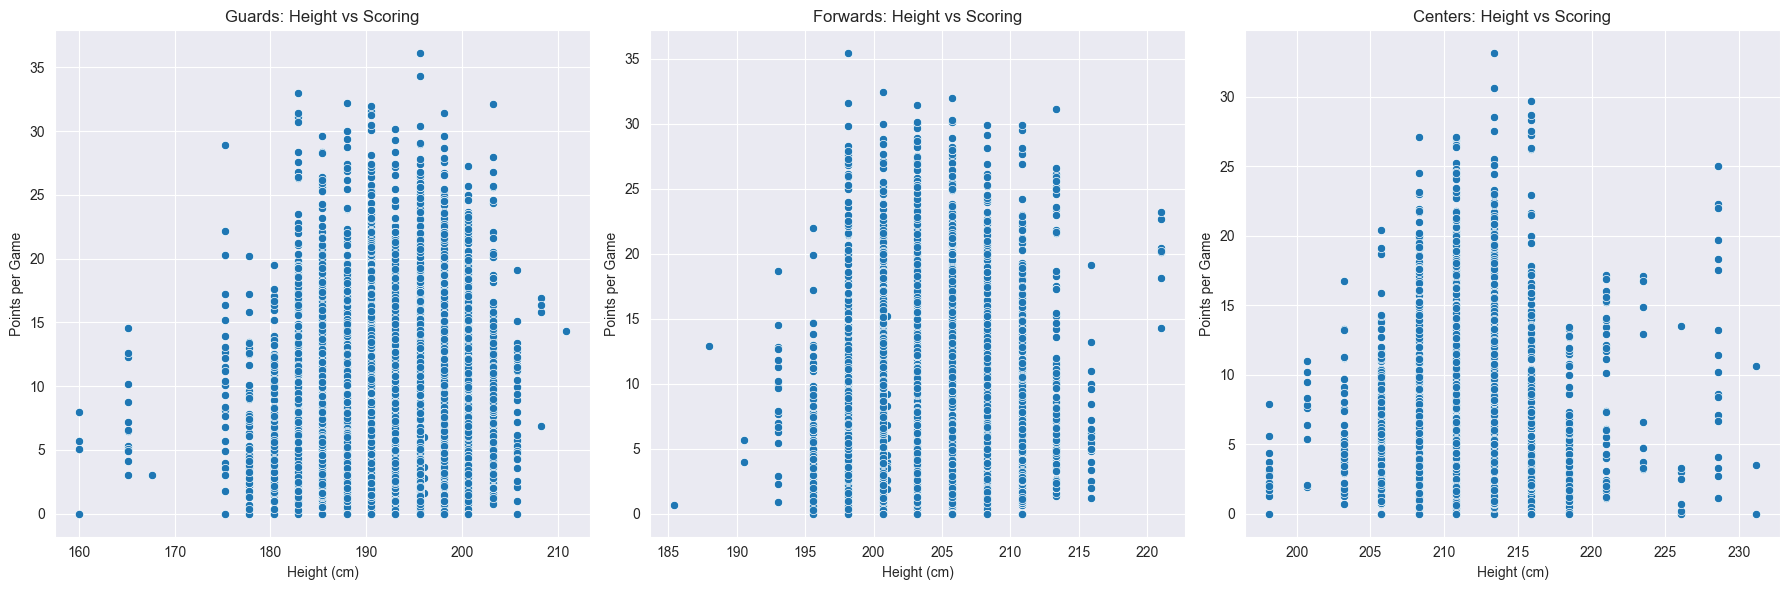

In [6]:
# Visualization: Scatter plots for height vs. scoring by position
plt.figure(figsize=(18, 6))

# Scatter plots for each position
for i, position in enumerate(['Guards', 'Forwards', 'Centers']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=basketball_data[basketball_data['POSITION'] == position[0]]['player_height'],
                    y=basketball_data[basketball_data['POSITION'] == position[0]]['pts'])
    plt.title(f"{position}: Height vs Scoring")
    plt.xlabel("Height (cm)")
    plt.ylabel("Points per Game")

plt.tight_layout()
plt.show()

### Impact of Age on Performance by Position:  
The effect of aging on performance metrics such as scoring, rebounding, and assists might differ by position, with guards potentially experiencing a decline in speed and agility earlier than centers or forwards.

In [7]:
# Grouping the data by position and age and calculating averages for performance metrics
grouped_data = basketball_data.groupby(['POSITION', 'age']).agg({'pts': 'mean', 'reb': 'mean', 'ast': 'mean'}).reset_index()

# Split the grouped data by position
grouped_guards = grouped_data[grouped_data['POSITION'] == 'G']
grouped_forwards = grouped_data[grouped_data['POSITION'] == 'F']
grouped_centers = grouped_data[grouped_data['POSITION'] == 'C']

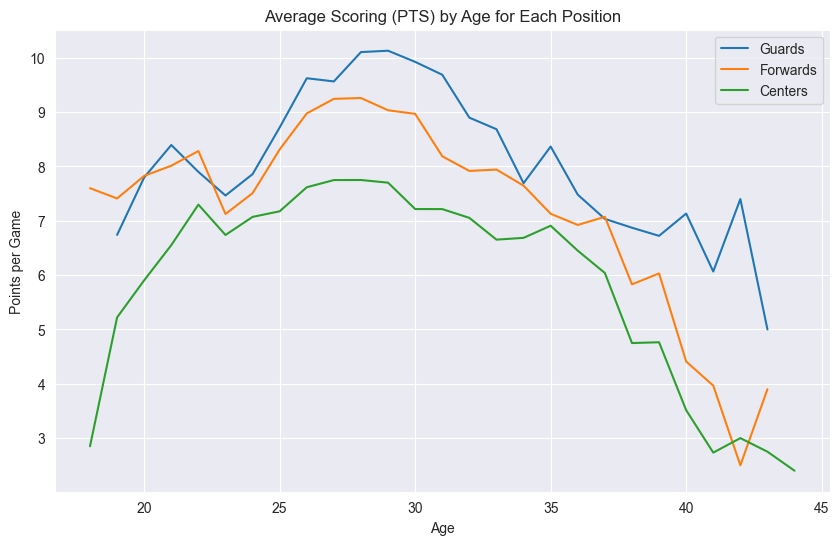

In [8]:
# Visualization for Scoring (PTS) by Age for Each Position
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='pts', data=grouped_guards, label='Guards')
sns.lineplot(x='age', y='pts', data=grouped_forwards, label='Forwards')
sns.lineplot(x='age', y='pts', data=grouped_centers, label='Centers')
plt.title('Average Scoring (PTS) by Age for Each Position')
plt.xlabel('Age')
plt.ylabel('Points per Game')
plt.legend()
plt.show()

The scoring abilities of all positions tend to peak in the mid to late 20s and shows a gradual decline as they age. 

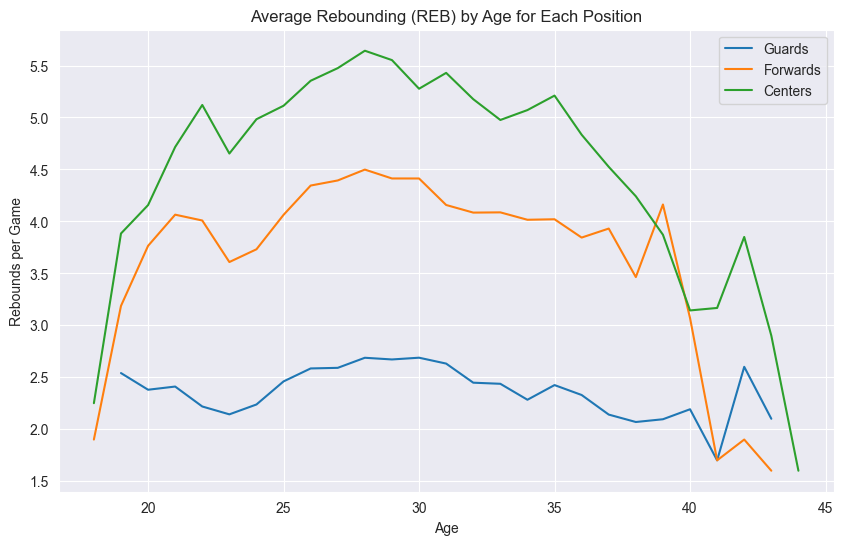

In [9]:
# Visualization for Rebounding (REB) by Age for Each Position
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='reb', data=grouped_guards, label='Guards')
sns.lineplot(x='age', y='reb', data=grouped_forwards, label='Forwards')
sns.lineplot(x='age', y='reb', data=grouped_centers, label='Centers')
plt.title('Average Rebounding (REB) by Age for Each Position')
plt.xlabel('Age')
plt.ylabel('Rebounds per Game')
plt.legend()
plt.show()

Rebounding ability appears to be less affected by age across all positions, with relatively stable averages throughout players' careers. This indicates that the skills and physical attributes required for effective rebounding might not diminish significantly with age.

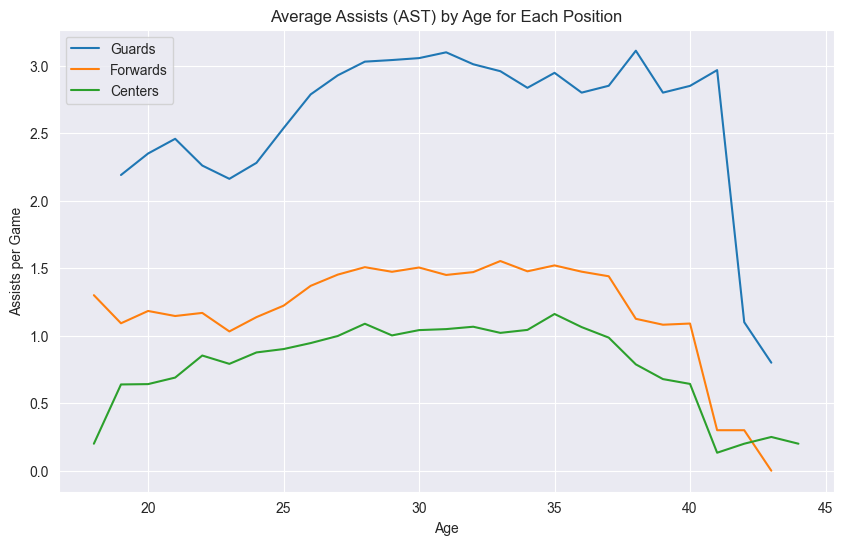

In [10]:
# Visualization for Assists (AST) by Age for Each Position
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='ast', data=grouped_guards, label='Guards')
sns.lineplot(x='age', y='ast', data=grouped_forwards, label='Forwards')
sns.lineplot(x='age', y='ast', data=grouped_centers, label='Centers')
plt.title('Average Assists (AST) by Age for Each Position')
plt.xlabel('Age')
plt.ylabel('Assists per Game')
plt.legend()
plt.show()

Assists do not show a significant decline with age, especially for guards, where it may even improve, indicating that experience and strategic understanding play a crucial role in playmaking abilities.